In [139]:
import math
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
from pandas.io.json import json_normalize

#packages to get the coordinates and distance
import geopy.geocoders
from geopy.geocoders import Nominatim
import requests
import geopy.distance

#packages for sentiment analysis

import en_core_web_sm
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.util import *
import gensim
from gensim import corpora

#package to create wordcloud
from wordcloud import WordCloud
 

# libraries for visualization
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import pyLDAvis
import pyLDAvis.gensim

#library to show dropdown list
from tkinter import *

In [140]:
city = str(input("Enter the city Name: "))

Enter the city Name: Buffalo


In [141]:
#retrieving the coordinates of the specified location
geopy.geocoders.options.default_user_agent = 'aiyngara'
nom = Nominatim()
location=nom.geocode(city, timeout=5)
lat_1=location.latitude
long_1= location.longitude

In [146]:
#Retreiving data from eventsbrite api
url_1 = "https://www.eventbriteapi.com/v3/events/search?location.longitude={}&location.latitude={}&expand=venue?&token=Enter your API token".format(long_1, lat_1)
results_1 = requests.get(url_1).json()
event = results_1["events"]
events_table = json_normalize(event)
events = []
venue_id = []
for i in event:
    events.append(i["name"]["text"])
    venue_id.append(i["venue_id"])
x = {"Events" : events, "Venue_id" : venue_id}
x = pd.DataFrame(x)

In [147]:
y = x.Events.tolist()

master = Tk()

variable = StringVar(master)
variable.set("Top Events") # default value

w = OptionMenu(master, variable, *(y)) 
w.pack()
venue_id = []
def ok():
    venue_id.append(x.Venue_id[x["Events"] == str(variable.get())].values[0])

button = Button(master, text="OK", command=ok)
button.pack()

mainloop()
#x.Events.tolist()

In [148]:
url_2 = "https://www.eventbriteapi.com/v3/venues/{}/?token=Enter your token here".format(venue_id[0])
results_2 = requests.get(url_2).json()
lat_2 = results_2['address']['latitude']
long_2 = results_2['address']['longitude']

In [149]:
CLIENT_ID = 'Enter your ID here'
CLIENT_SECRET = 'Enter your Key here'
VERSION = '20180604'

In [150]:
url_3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&r={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    '20180604', 
    lat_2, 
    long_2, 
    1000, 
    20)
results_3 = requests.get(url_3).json()

In [151]:
venues = results_3['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
list = []
i = 0
while i < len(nearby_venues['venue.categories']):
    x = nearby_venues['venue.categories'].apply(pd.Series)
    list.append(x[0][i]['name'])
    i = i+1

nearby_venues['venue.categories'] = list
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
near_ven = nearby_venues["name"].values.tolist()

In [152]:
list_1 = nearby_venues["name"].tolist()
list_2 = nearby_venues["lat"].tolist()
list_3 = nearby_venues["lng"].tolist()

In [153]:
k=0
venue_id = []

while(k < len(list_1)):
    url_4 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?input={}&inputtype=textquery&fields=photos,formatted_address,name,opening_hours,place_id&locationbias=circle:2000@{},{}&key=Enter your Key here".format(list_1[k],list_2[k],list_3[k])
    results_4 = requests.get(url_4).json()
    venue_id.append(results_4['candidates'][0]['place_id'])
    k=k+1

In [154]:
kk=0
venue_rev = {}
latitude = []
longitude = []
ratings = []
while(kk < len(venue_id)):
    url_5 = "https://maps.googleapis.com/maps/api/place/details/json?placeid={}&fields=name,rating,review,formatted_phone_number&key= Enter your Key here".format(venue_id[kk])
    results_5 = requests.get(url_5).json()
    if(len(results_5["result"]) > 1):
        reviews = results_5["result"]["reviews"]
        reviews_table = json_normalize(reviews) 
        if (len(reviews_table["text"].tolist()) == 5):
            venue_rev[list_1[kk]]=reviews_table["text"].tolist()
            latitude.append(list_2[kk])
            longitude.append(list_3[kk])
            ratings.append(results_5["result"]["rating"])
    kk=kk+1

In [155]:
venues = [*venue_rev]

In [157]:
#import geopy.distance
coordinates_1 = (float(lat_2), float(long_2)) #The event location
distance = []
for coord in range(len(latitude)):
    coordinates_2 = (latitude[coord], longitude[coord])
    distance.append(math.ceil(geopy.distance.vincenty(coordinates_1, coordinates_2).km*1000))

C:\Users\aiyng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.

C:\Users\aiyng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.

C:\Users\aiyng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.

C:\Users\aiyng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher

In [159]:
sentance = pd.DataFrame(venue_rev)

In [160]:
#Converting every review into a numerical value with a maximum of 5 points based on the 
#positive and negative scores obtained from SentimentIntensityAnalyzer and stored as ratings_weighted
score = []
length_review = []
for names in venues:
    score.append(sentance[names].tolist())
for length in range(len(score)):
    length_review.append(len(score[length]))
pos_score = []
neg_score = []
neu_score = []
review_score_pos=[]
review_score_neg=[]
review_score_neu=[]
sid = SentimentIntensityAnalyzer()
gk=0

while(gk<len(score)):
    positive_Score_list=[]
    negative_Score_list=[]
    neutral_Score_list=[]
    gh=0   
    
    while(gh<len(score[gk])):
        ss = sid.polarity_scores(score[gk][gh])
        for k,j in ss.items():
            if(k=='pos'):
                positive_Score_list.append(j)
            if(k=='neg'):
                negative_Score_list.append(j)
            if(k=='neu'):
                neutral_Score_list.append(j)
            
        gh=gh+1
    pos_score.append(positive_Score_list)
    neg_score.append(negative_Score_list)
    neu_score.append(neutral_Score_list)
    review_score_pos.append((sum(pos_score[gk])/length_review[gk])*100)
    review_score_neg.append((sum(neg_score[gk])/length_review[gk])*100)
    review_score_neu.append((sum(neu_score[gk])/length_review[gk])*100)
    gk=gk+1

In [24]:
#calculating the rating scores based on the review
rev_score = np.array(review_score_pos)/(np.array(review_score_neg)+ np.array(review_score_pos)) * 5
weighted_ratings = (0.5*np.array(ratings)) + (0.5* rev_score)
ratings_weighted = np.around((weighted_ratings),2).tolist()

In [231]:
venues_map = folium.Map(location=[float(lat_2), float(long_2)], zoom_start=15, tiles="cartodbpositron")
folium.Marker(location=[float(lat_2), float(long_2)], icon=folium.Icon(color='Red', icon='ok-sign')).add_to(venues_map)
for lat, lng, label, dist, rat in zip(latitude, longitude, venues, distance, ratings_weighted):
    folium.CircleMarker(
        [lat, lng], radius = 3**rat/15 , color = "#31c4cc", popup ="Name : " + label + ", distance : " + str(dist) + " meters" + "ratings : " + str(rat) , fill_color = '#ff9c3f', fill_opacity=0.8
    ).add_to(venues_map)

In [232]:
#shows the top 20 hangout spots around 1000m radius from the event in a map
venues_map

In [27]:
#creating a dictionary of venue names, ratings(from reviews), actual ratings, distance and reviews
dictionary = {"venue name" : venues, "ratings" : ratings_weighted, "actual ratings" : ratings, "Distance from the event in meters" : distance, "reviews" : score}
final = pd.DataFrame(dictionary)

#shows the shortes hangout spot from the event location
shortest = final[final["Distance from the event in meters"] == final["Distance from the event in meters"].min()]
shortest

,venue name,ratings,actual ratings,Distance from the event in meters,reviews
5,Campus House,5.0,5.0,119,"[Extremely professional staff, immaculate dini..."


In [28]:
#shows the best hangout spot from the event location based on the ratings
best = final[final["ratings"] == final["ratings"].max()]
best

,venue name,ratings,actual ratings,Distance from the event in meters,reviews
5,Campus House,5.0,5.0,119,"[Extremely professional staff, immaculate dini..."


In [31]:
#creating a dropdown list of popular hangoutspots/venues around the event location to make a selection
reviews_1 = [*venue_rev]

master = Tk()

variable = StringVar(master)
variable.set("Popular Venues") # default value

w = OptionMenu(master, variable, *(reviews_1)) 
w.pack()
selected_name = []
def ok():
    selected_name.append(str(variable.get()))

button = Button(master, text="OK", command=ok)
button.pack()

mainloop()
#x.Events.tolist()

In [32]:
venue_name = selected_name[0]
#venue_name

'BikeorBar'

In [34]:
positive_Score_list_1=[]
negative_Score_list_1=[]
neutral_Score_list_1=[]

length_review = len(sentance[venue_name])
review_score=[]

for dum in sentance[venue_name]:
    ss_1 = sid.polarity_scores(dum)
    #print(ss_1)
    for l,m in ss_1.items():
        if(l=='pos'):
            positive_Score_list_1.append(m)
        if(l=='neg'):
            negative_Score_list_1.append(m)
        if(l=='neu'):
            neutral_Score_list_1.append(m)

review_score.append((sum(positive_Score_list_1)/length_review)*100)
review_score.append((sum(negative_Score_list_1)/length_review)*100)
review_score.append((sum(neutral_Score_list_1)/length_review)*100)
#review_score

In [138]:
color = ["green", "red", "blue"]
labels = ["Positive", "Negative", "Neutral"]
trace = go.Pie(labels=labels, values=review_score)
plotly.offline.init_notebook_mode(connected = True)
plotly.offline.iplot([trace], filename='basic_pie_chart')

In [39]:
#A function to plot the frequency of words
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    fdist_keys=[]
    fdist_values=[]
    for key in fdist.keys():
        fdist_keys.append(key)
    for values in fdist.values():
        fdist_values.append(values)  
    
    words_df = pd.DataFrame({'word':fdist_keys, 'count':fdist_values})
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [40]:
# remove unwanted characters, numbers and symbols
sentance[venue_name] = sentance[venue_name].str.replace("[^a-zA-Z#]", " ")

In [41]:
#from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words = stopwords.words('english')

In [42]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
sentance[venue_name] = sentance[venue_name].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in sentance[venue_name]]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [43]:
#import en_core_web_sm
nlp = en_core_web_sm.load()

In [44]:
#A function for lemmatizing (filtering nouns and adjectives)
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [45]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
#print(tokenized_reviews[1])

['crazy', 'intense', 'classes', 'make', 'every', 'workout', 'enjoyable', 'unforgettable', 'been', 'fan', 'since', 'inception', 'every', 'year', 'bikeorbar', 'keeps', 'topping', 'game', 'crossfit', 'hip', 'hop', 'spin', 'hiit', 'classes', 'name', 'ahead', 'curve', 'years', 'highly', 'recommended']


In [46]:
reviews_2 = lemmatization(tokenized_reviews)
#print(reviews_2[1]) # print lemmatized review

['crazy', 'intense', 'class', 'workout', 'enjoyable', 'unforgettable', 'fan', 'inception', 'year', 'bikeorbar', 'game', 'crossfit', 'hip', 'hop', 'spin', 'hiit', 'class', 'curve', 'year']


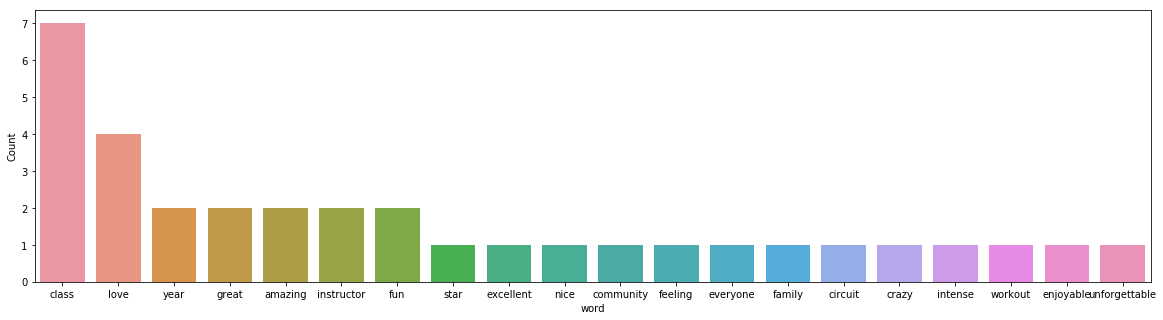

In [47]:
#plotting mostfrequent words after lemmatizing
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

sentance[venue_name] = reviews_3
freq_words(sentance[venue_name], 20)

In [91]:
joined_reviews = " ".join([t for t in reviews])

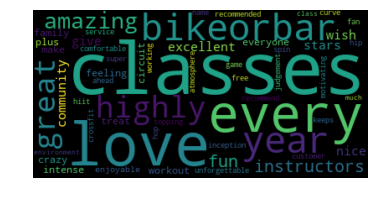

In [68]:

text = joined_reviews

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()